In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




In [32]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [34]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Hence its time to visualize the data


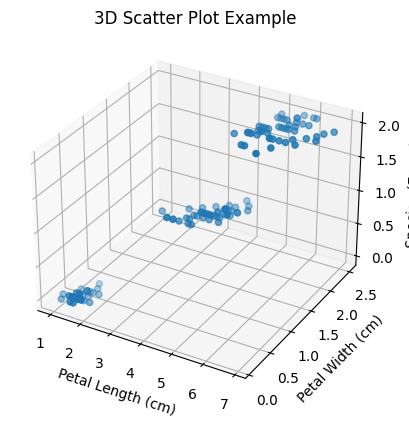

In [35]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species_encoded)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Species (Encoded)')
plt.title('3D Scatter Plot Example')
plt.show()


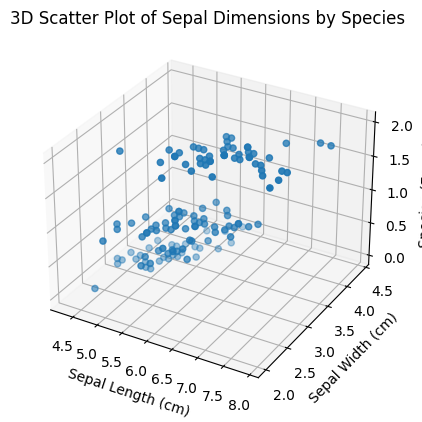

In [36]:
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species_encoded)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Species (Encoded)')
plt.title('3D Scatter Plot of Sepal Dimensions by Species')
plt.show()


Thus 3-D plot gives us the glimpse of species of iris flower is more inclined towards the variables petal length and petal width

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

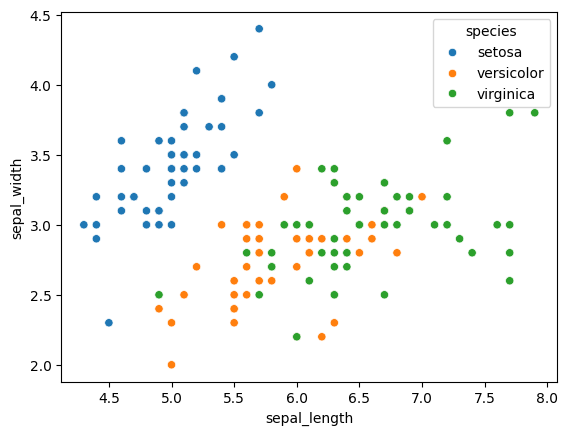

In [37]:
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species")

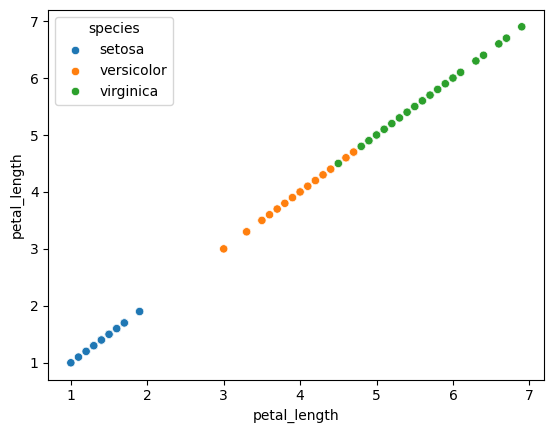

In [38]:
sns.scatterplot(data=df,x="petal_length",y="petal_length",hue="species");

Applying Elbow Technique

In [39]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['petal_length','petal_width']])
  sse.append(km.inertia_)


In [40]:
sse

[550.8953333333333,
 86.39021984551391,
 31.412885668276974,
 20.299607803485397,
 14.130893864755931,
 11.070652341896283,
 9.991212640300875,
 8.310917572765398,
 6.5993225566703835]

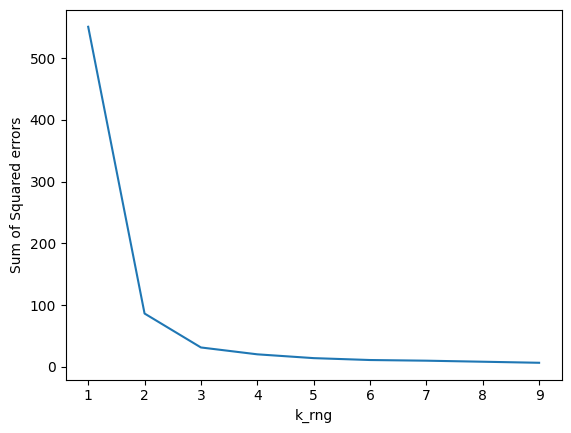

In [41]:
plt.xlabel('k_rng')
plt.ylabel('Sum of Squared errors')
plt.plot(k_rng,sse)

Applying KMean Algorithm


In [42]:
km=KMeans(n_clusters=3,random_state=0)
y_predicted=km.fit_predict(df[['petal_length','petal_width',]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,cluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,2
146,6.3,2.5,5.0,1.9,virginica,2,2
147,6.5,3.0,5.2,2.0,virginica,2,2
148,6.2,3.4,5.4,2.3,virginica,2,2


Accuracy measure

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
cm = confusion_matrix(df.species_encoded, df.cluster)
print(cm)


[[ 0 50  0]
 [48  0  2]
 [ 4  0 46]]


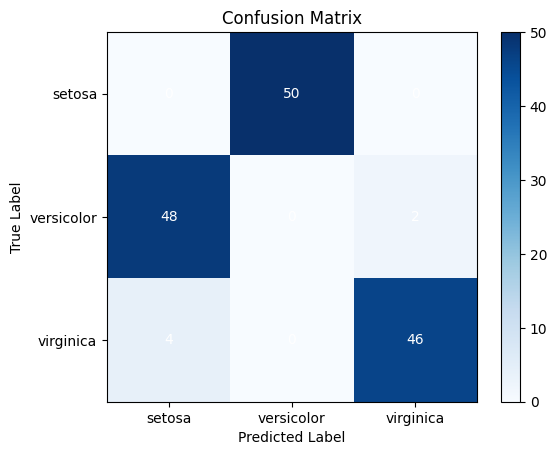

In [45]:
True_labels = df.species_encoded # Use the encoded labels for species
predicted_labels = df.cluster
cm = confusion_matrix(True_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica'] # Keep the original labels for visualization
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()